# 7 - Model Evaluation

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import plotly.express as px

import seaborn as sns

## Plot Metrics

In [2]:
def plot_metrics(path, function = "mean", subtitle = None):
    
    """
    path (string) - path
    function (string) - "max", "mean", or "min"
    subtitle (string) - subtitle
    """
    
    metrics = pd.read_csv(path)
    metrics = metrics.pivot_table(index = ["k", "alpha", "eta"], aggfunc = "mean")
    metrics = metrics.reset_index()
    metrics = metrics.pivot_table(index = "k", aggfunc = function)
    metrics = metrics.reset_index()
    
    fig, axs = plt.subplots(1, 4, figsize = (20, 4))
    
    if subtitle is None:
        pass
    else:
        fig.suptitle(subtitle)
        
    plt.subplots_adjust(top = 0.9, wspace = 0.3) #
    
    axs[0].plot(metrics["k"], metrics["u_mass"])
    axs[1].plot(metrics["k"], metrics["c_v"])
    axs[2].plot(metrics["k"], metrics["c_uci"])
    axs[3].plot(metrics["k"], metrics["c_npmi"])
    
    for i in range(4):
        axs[i].set_xlim((min(metrics["k"]), max(metrics["k"])))
        axs[i].set_xlabel("Number of Topics (k)")
        
    axs[0].set_ylabel("UMass")
    axs[1].set_ylabel("C V")
    axs[2].set_ylabel("UCI")
    axs[3].set_ylabel("NPMI")

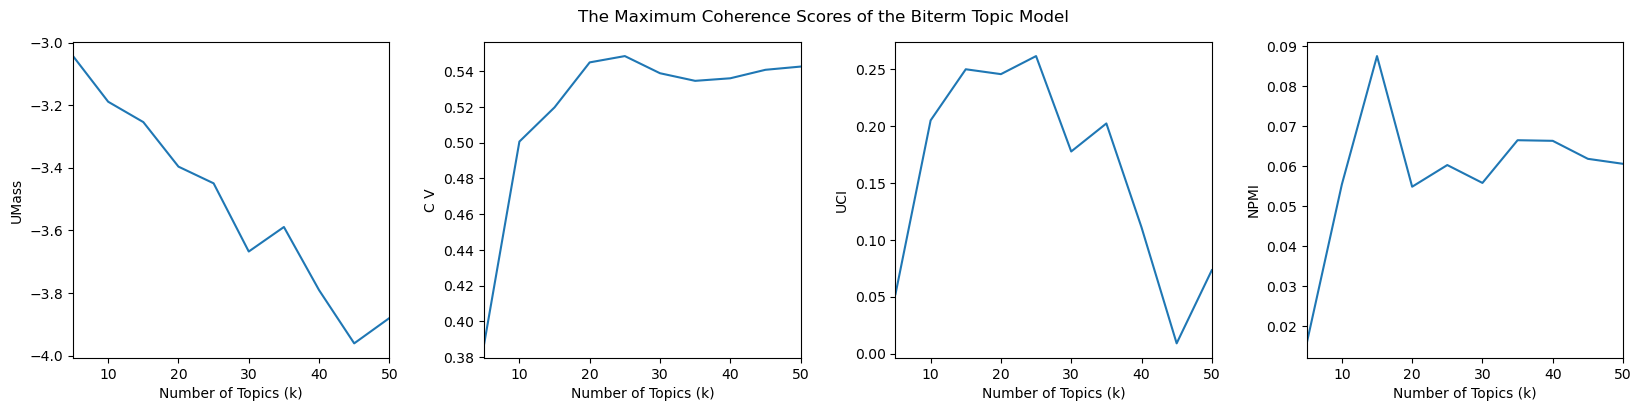

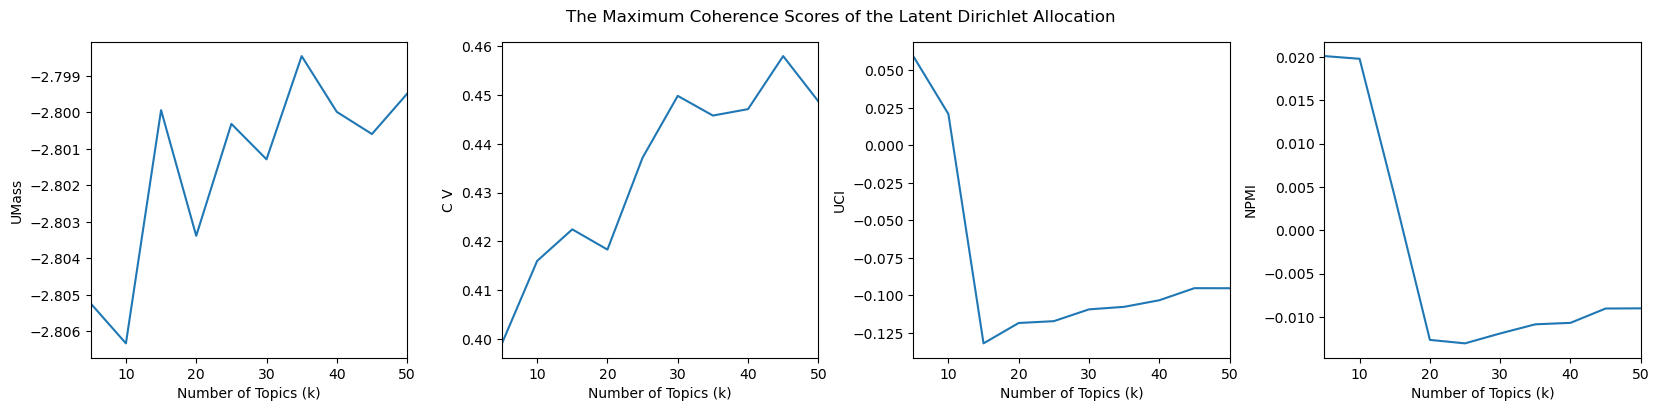

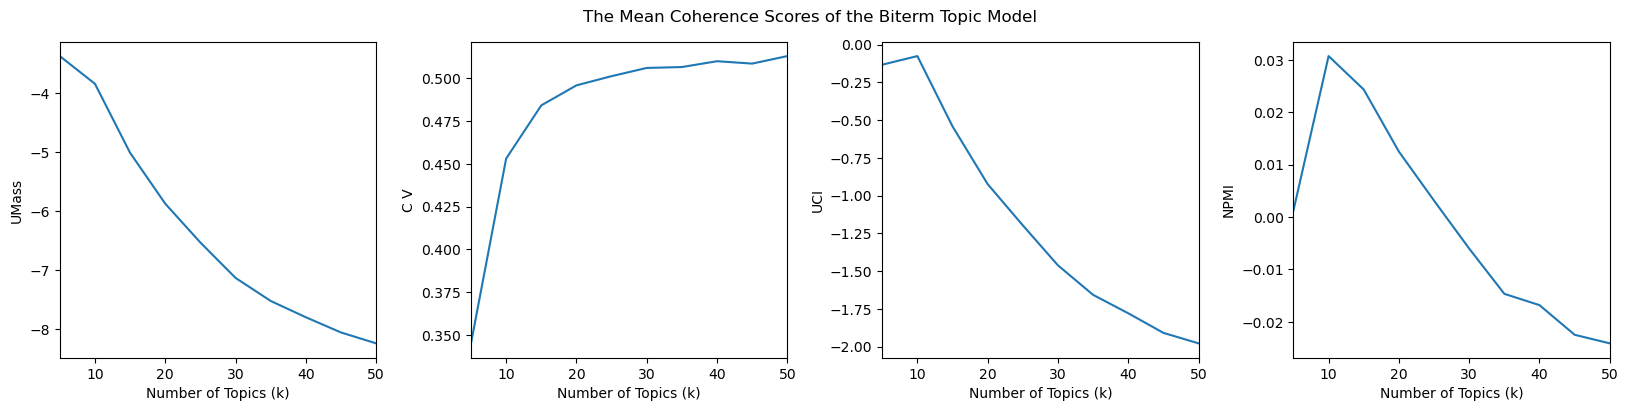

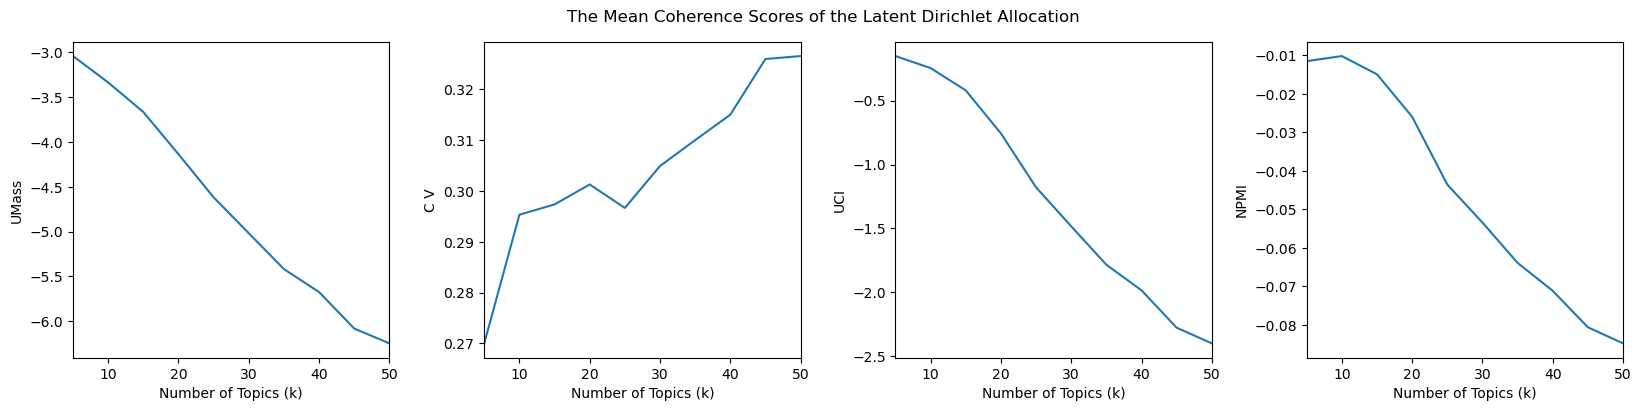

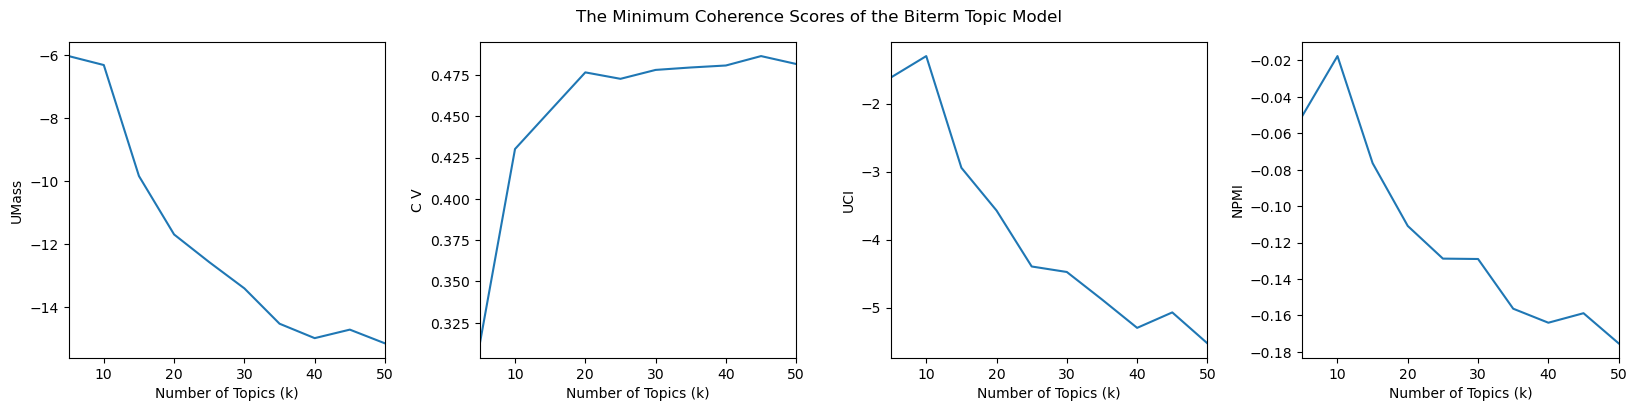

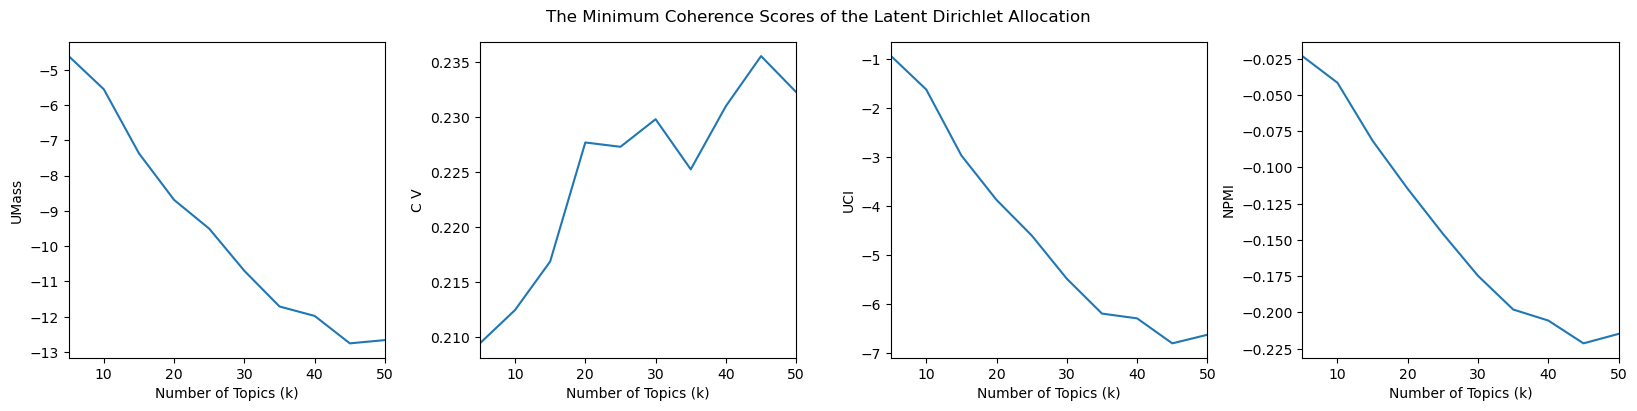

In [3]:
plot_metrics(path = "outputs/metrics/btm.csv",
             function = "max",
             subtitle = "The Maximum Coherence Scores of the Biterm Topic Model")

plot_metrics(path = "outputs/metrics/lda.csv",
             function = "max",
             subtitle = "The Maximum Coherence Scores of the Latent Dirichlet Allocation")

plot_metrics(path = "outputs/metrics/btm.csv",
             function = "mean",
             subtitle = "The Mean Coherence Scores of the Biterm Topic Model")

plot_metrics(path = "outputs/metrics/lda.csv",
             function = "mean",
             subtitle = "The Mean Coherence Scores of the Latent Dirichlet Allocation")

plot_metrics(path = "outputs/metrics/btm.csv",
             function = "min",
             subtitle = "The Minimum Coherence Scores of the Biterm Topic Model")

plot_metrics(path = "outputs/metrics/lda.csv",
             function = "min",
             subtitle = "The Minimum Coherence Scores of the Latent Dirichlet Allocation")

## Metrics

In [4]:
btm = pd.read_csv("outputs/metrics/btm.csv")
lda = pd.read_csv("outputs/metrics/lda.csv")

# calculate the average coherence score for all top words
btm = btm.groupby(["k", "alpha", "eta"]).mean().reset_index()
lda = lda.groupby(["k", "alpha", "eta"]).mean().reset_index()

btm["hyperparameters"] = "\u03B1 = " + btm["alpha"].astype(str) + "/k \u03B2 = " + btm["eta"].astype(str)
lda["hyperparameters"] = "\u03B1 = " + lda["alpha"].astype(str) + "/k \u03B2 = " + lda["eta"].astype(str)

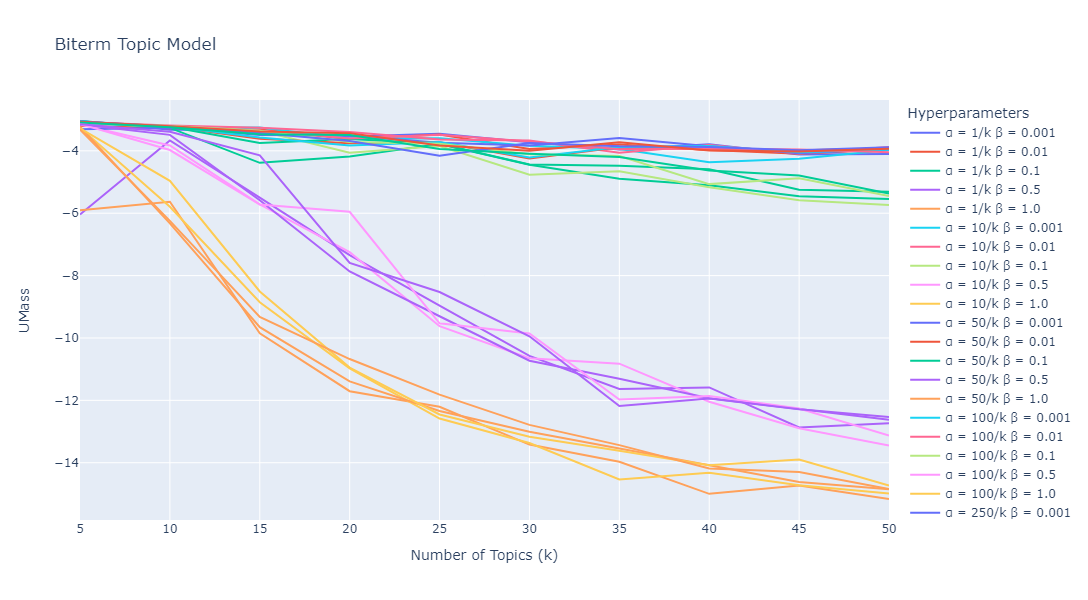

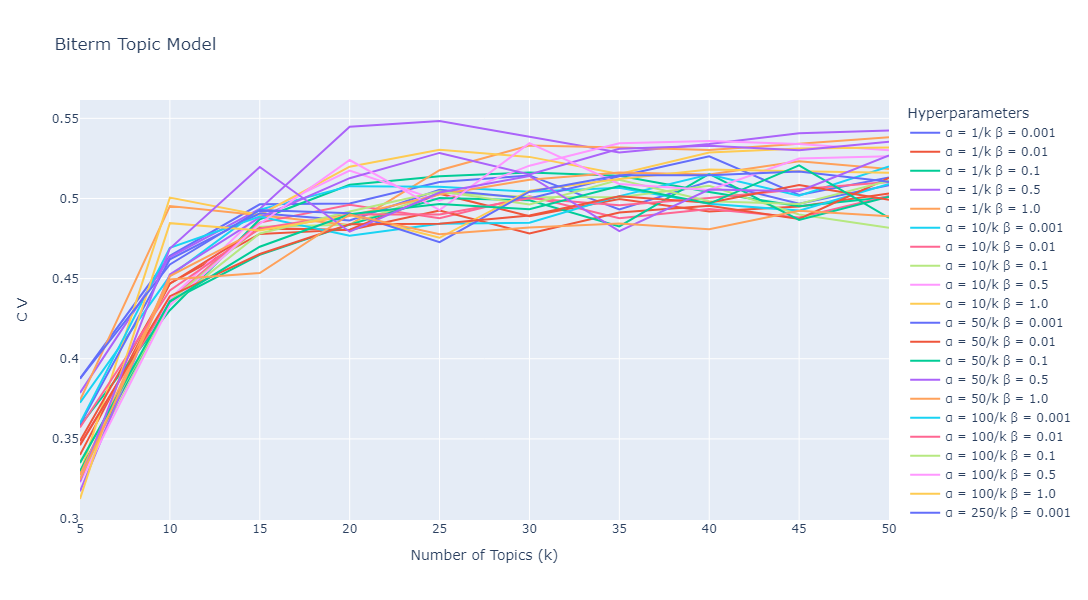

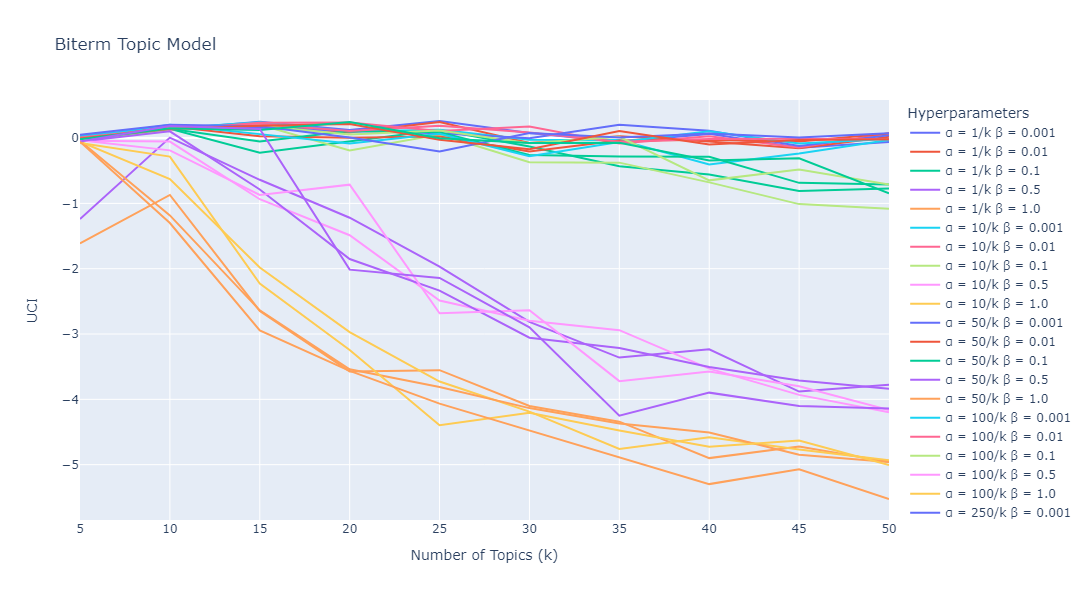

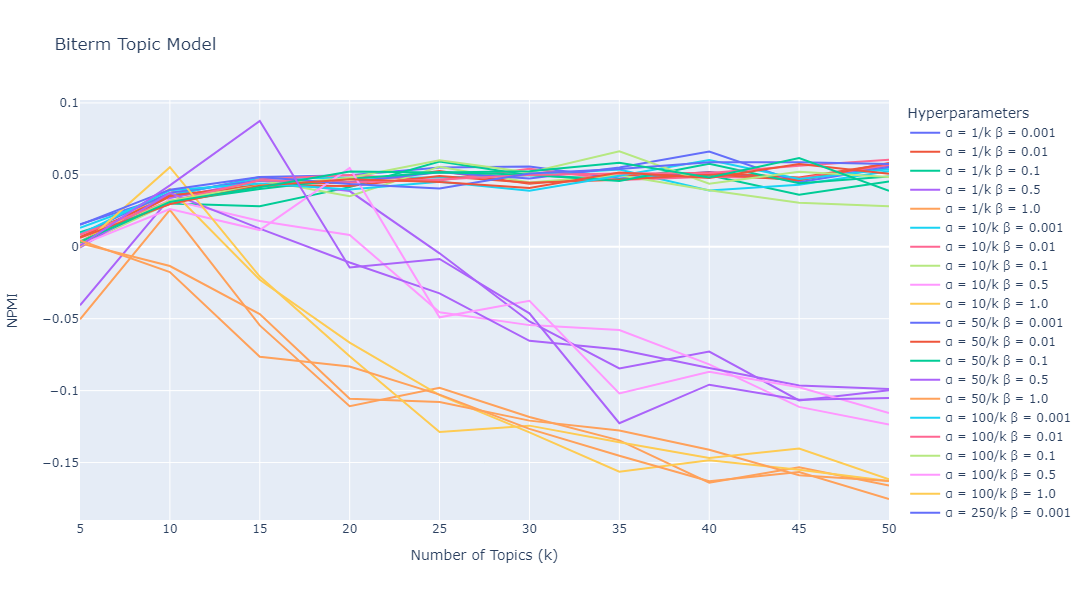

In [5]:
px.line(data_frame = btm,
        x = "k",
        y = "u_mass",
        color = "hyperparameters",
        labels = {"u_mass" : "UMass", "k" : "Number of Topics (k)", "hyperparameters" : "Hyperparameters"},
        title = "Biterm Topic Model",
        width = 1000,
        height = 600).show()

px.line(data_frame = btm,
        x = "k",
        y = "c_v",
        color = "hyperparameters",
        labels = {"c_v" : "C V", "k" : "Number of Topics (k)", "hyperparameters" : "Hyperparameters"},
        title = "Biterm Topic Model",
        width = 1000,
        height = 600).show()

px.line(data_frame = btm,
        x = "k",
        y = "c_uci",
        color = "hyperparameters",
        labels = {"c_uci" : "UCI", "k" : "Number of Topics (k)", "hyperparameters" : "Hyperparameters"},
        title = "Biterm Topic Model",
        width = 1000,
        height = 600).show()

px.line(data_frame = btm,
        x = "k",
        y = "c_npmi",
        color = "hyperparameters",
        labels = {"c_npmi" : "NPMI", "k" : "Number of Topics (k)", "hyperparameters" : "Hyperparameters"},
        title = "Biterm Topic Model",
        width = 1000,
        height = 600).show()

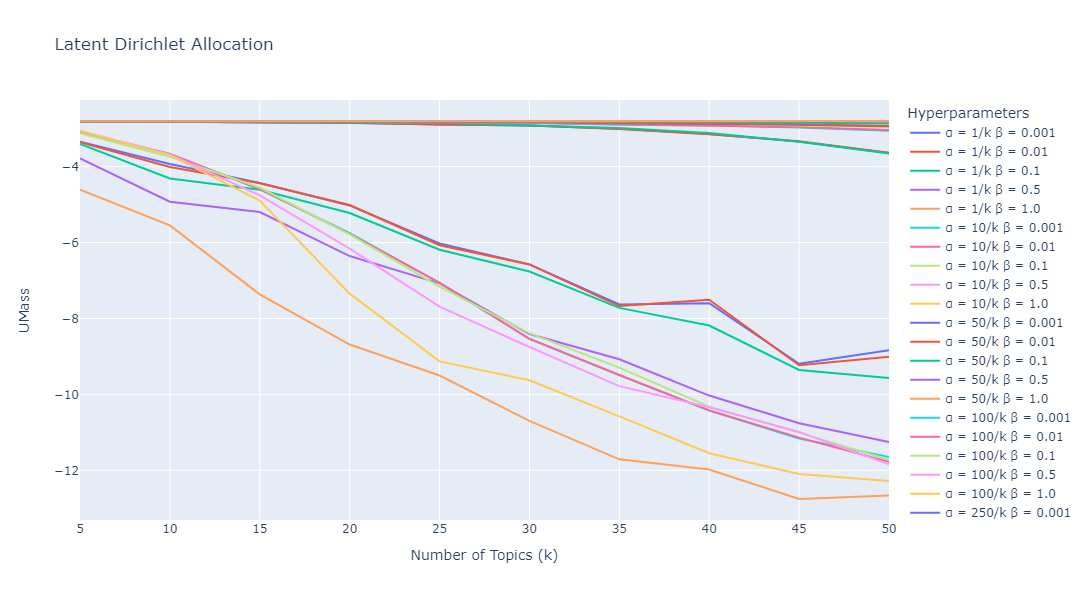

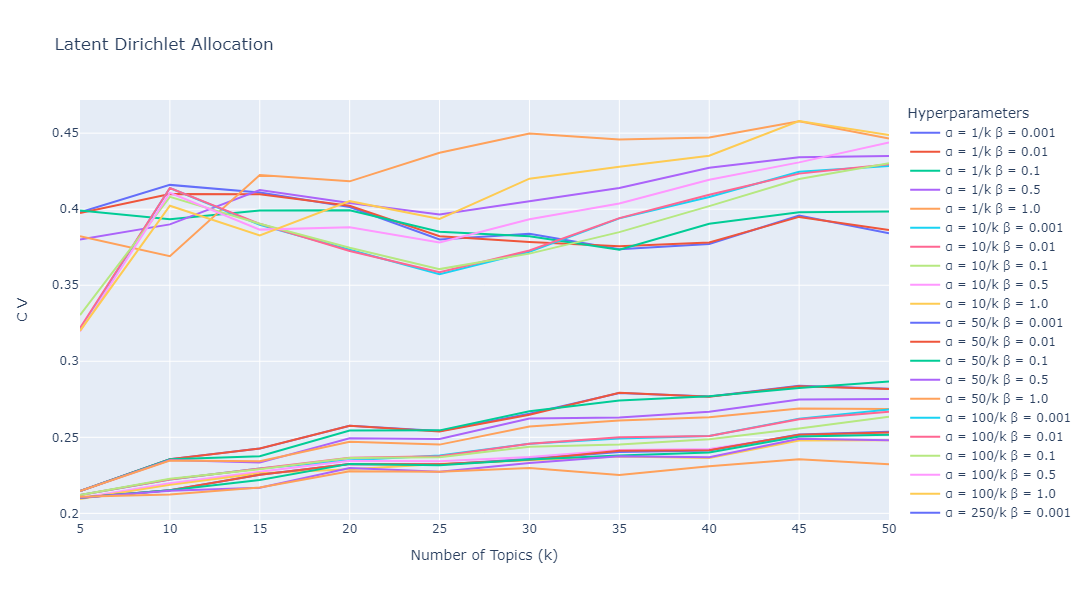

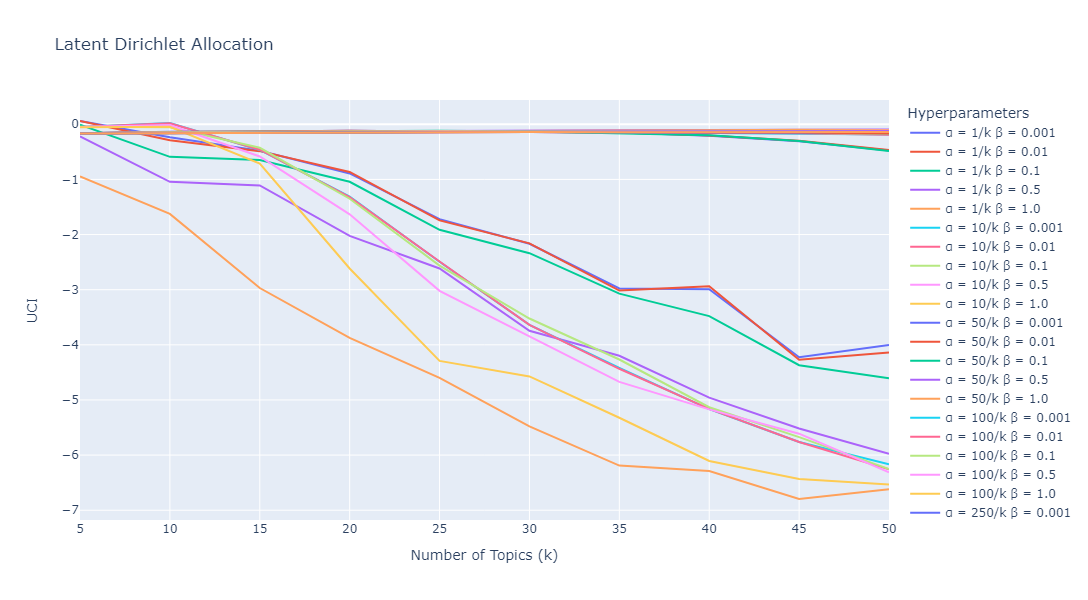

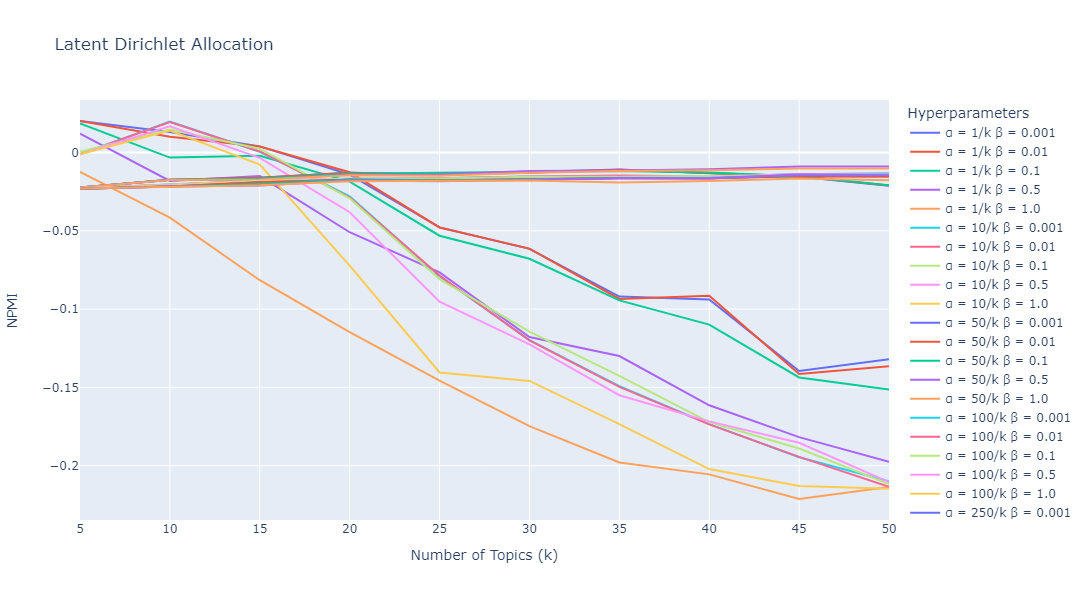

In [6]:
px.line(data_frame = lda,
        x = "k",
        y = "u_mass",
        color = "hyperparameters",
        labels = {"u_mass" : "UMass", "k" : "Number of Topics (k)", "hyperparameters" : "Hyperparameters"},
        title = "Latent Dirichlet Allocation",
        width = 1000,
        height = 600).show()

px.line(data_frame = lda,
        x = "k",
        y = "c_v",
        color = "hyperparameters",
        labels = {"c_v" : "C V", "k" : "Number of Topics (k)", "hyperparameters" : "Hyperparameters"},
        title = "Latent Dirichlet Allocation",
        width = 1000,
        height = 600).show()

px.line(data_frame = lda,
        x = "k",
        y = "c_uci",
        color = "hyperparameters",
        labels = {"c_uci" : "UCI", "k" : "Number of Topics (k)", "hyperparameters" : "Hyperparameters"},
        title = "Latent Dirichlet Allocation",
        width = 1000,
        height = 600).show()

px.line(data_frame = lda,
        x = "k",
        y = "c_npmi",
        color = "hyperparameters",
        labels = {"c_npmi" : "NPMI", "k" : "Number of Topics (k)", "hyperparameters" : "Hyperparameters"},
        title = "Latent Dirichlet Allocation",
        width = 1000,
        height = 600).show()

## The Optimal Hyperparameter Settings of the BTM and LDA models

Text(0, 0.5, 'Normalized Pointwise Mutual Information (NPMI)')

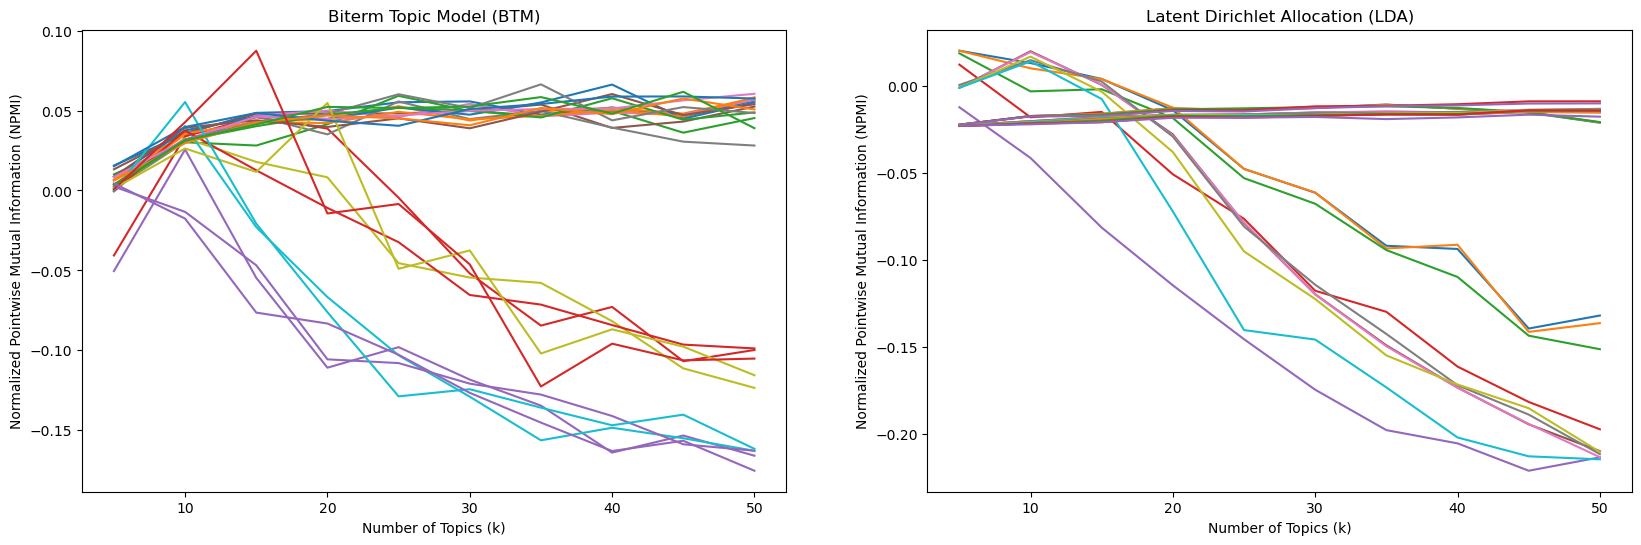

In [7]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 6))

# Biterm Topic Model

for i in btm["hyperparameters"].unique():
    data = btm[btm["hyperparameters"] == i]
    axs[0].plot(data["k"], data["c_npmi"], label = i)
    
axs[0].set_title("Biterm Topic Model (BTM)") #
axs[0].set_xlabel("Number of Topics (k)")
axs[0].set_ylabel("Normalized Pointwise Mutual Information (NPMI)")

# Latent Dirichlet Allocation

for i in lda["hyperparameters"].unique():
    data = lda[lda["hyperparameters"] == i]
    axs[1].plot(data["k"], data["c_npmi"], label = i)
    
axs[1].set_title("Latent Dirichlet Allocation (LDA)") #
axs[1].set_xlabel("Number of Topics (k)")
axs[1].set_ylabel("Normalized Pointwise Mutual Information (NPMI)")

C:\Users\Ronald Benz\AppData\Local\Temp\ipykernel_18652\2466222293.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\Ronald Benz\AppData\Local\Temp\ipykernel_18652\2466222293.py:23: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



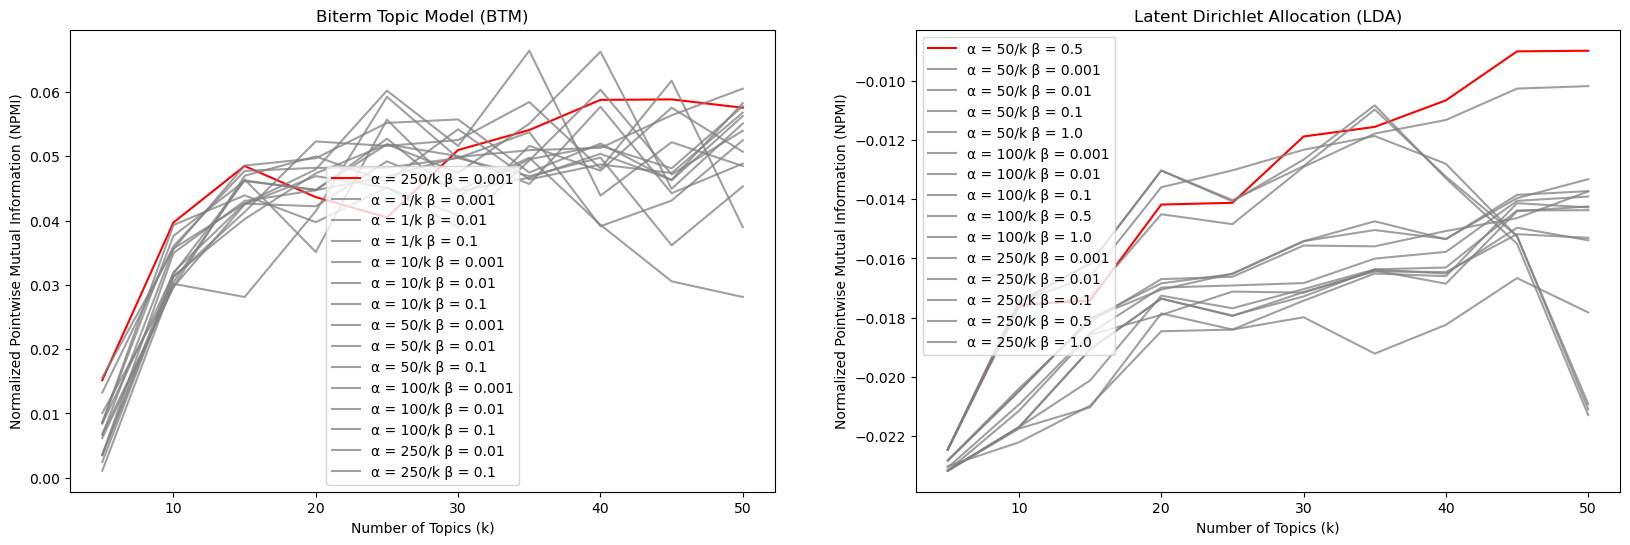

In [8]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 6))

# Biterm Topic Model

btm_filtered = btm[btm["eta"] != 1.0][btm["eta"] != 0.5]
optimal = "α = 250/k β = 0.001"
btm_optimal = btm_filtered[btm_filtered["hyperparameters"] == optimal]
btm_not_optimal = btm_filtered[btm_filtered["hyperparameters"] != optimal]
    
axs[0].plot(btm_optimal["k"], btm_optimal["c_npmi"], label = optimal, color = "red")

for i in btm_not_optimal["hyperparameters"].unique():
    data = btm_not_optimal[btm_not_optimal["hyperparameters"] == i]
    axs[0].plot(data["k"], data["c_npmi"], label = i, alpha = 0.75, color = "gray")
    
axs[0].set_title("Biterm Topic Model (BTM)") #
axs[0].set_xlabel("Number of Topics (k)")
axs[0].set_ylabel("Normalized Pointwise Mutual Information (NPMI)")
axs[0].legend()

# Latent Dirichlet Allocation

lda_filtered = lda[lda["alpha"] != 1][lda["alpha"] != 10]
optimal = "α = 50/k β = 0.5"
lda_optimal = lda_filtered[lda_filtered["hyperparameters"] == optimal]
lda_not_optimal = lda_filtered[lda_filtered["hyperparameters"] != optimal]

axs[1].plot(lda_optimal["k"], lda_optimal["c_npmi"], label = optimal, color = "red")

for i in lda_not_optimal["hyperparameters"].unique():
    data = lda_not_optimal[lda_not_optimal["hyperparameters"] == i]
    axs[1].plot(data["k"], data["c_npmi"], label = i, alpha = 0.75, color = "gray")
    
axs[1].set_title("Latent Dirichlet Allocation (LDA)") #
axs[1].set_xlabel("Number of Topics (k)")
axs[1].set_ylabel("Normalized Pointwise Mutual Information (NPMI)")
axs[1].legend()

## The Optimal Hyperparameter Settings of the BTM model

In [9]:
# calculate the average coherence score for all topic
btm_mean = btm.groupby("hyperparameters").mean().reset_index()

In [10]:
btm_mean[btm_mean.u_mass == max(btm_mean.u_mass)]

hyperparameters     k  alpha   eta     m   u_mass       c_v    c_uci  \
6  α = 10/k β = 0.01  27.5   10.0  0.01  20.0 -3.60611  0.472403  0.07601   

     c_npmi  
6  0.043288

In [11]:
btm_mean[btm_mean.c_v == max(btm_mean.c_v)]

hyperparameters     k  alpha  eta     m    u_mass       c_v     c_uci  \
3  α = 1/k β = 0.5  27.5    1.0  0.5  20.0 -9.091569  0.511337 -2.212504   

     c_npmi  
3 -0.034266

In [12]:
btm_mean[btm_mean.c_uci == max(btm_mean.c_uci)]

hyperparameters     k  alpha   eta     m   u_mass       c_v    c_uci  \
6  α = 10/k β = 0.01  27.5   10.0  0.01  20.0 -3.60611  0.472403  0.07601   

     c_npmi  
6  0.043288

In [13]:
btm_mean[btm_mean.c_npmi == max(btm_mean.c_npmi)]

hyperparameters     k  alpha    eta     m   u_mass       c_v  \
15  α = 250/k β = 0.001  27.5  250.0  0.001  20.0 -3.68878  0.486331   

       c_uci    c_npmi  
15  0.048146  0.046763

In [14]:
btm_mean[btm_mean.hyperparameters == "α = 250/k β = 0.001"]

hyperparameters     k  alpha    eta     m   u_mass       c_v  \
15  α = 250/k β = 0.001  27.5  250.0  0.001  20.0 -3.68878  0.486331   

       c_uci    c_npmi  
15  0.048146  0.046763

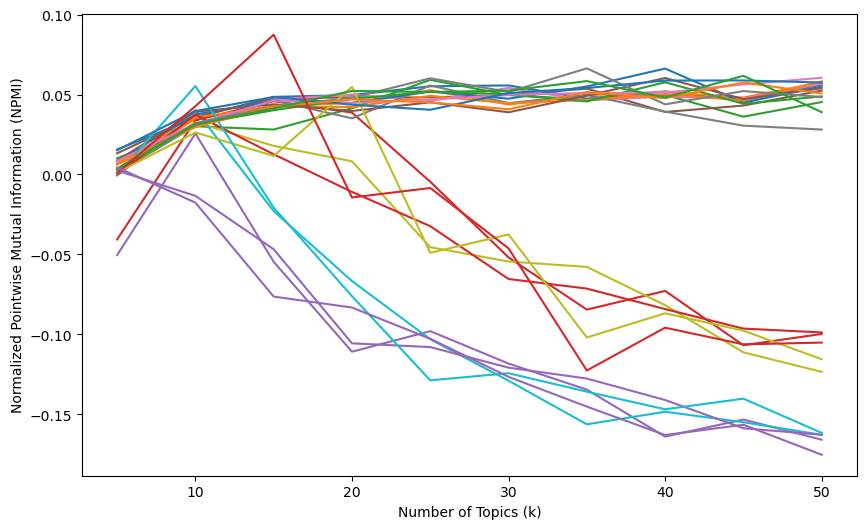

In [15]:
fig, ax = plt.subplots(figsize = (10, 6))

for i in btm["hyperparameters"].unique():
    data = btm[btm["hyperparameters"] == i]
    ax.plot(data["k"], data["c_npmi"], label = i)
    
# plt.title("The Coherence Scores of Biterm Topic Model in Different Hyperparameters")
plt.xlabel("Number of Topics (k)")
plt.ylabel("Normalized Pointwise Mutual Information (NPMI)")
plt.show()

C:\Users\Ronald Benz\AppData\Local\Temp\ipykernel_18652\2498994718.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



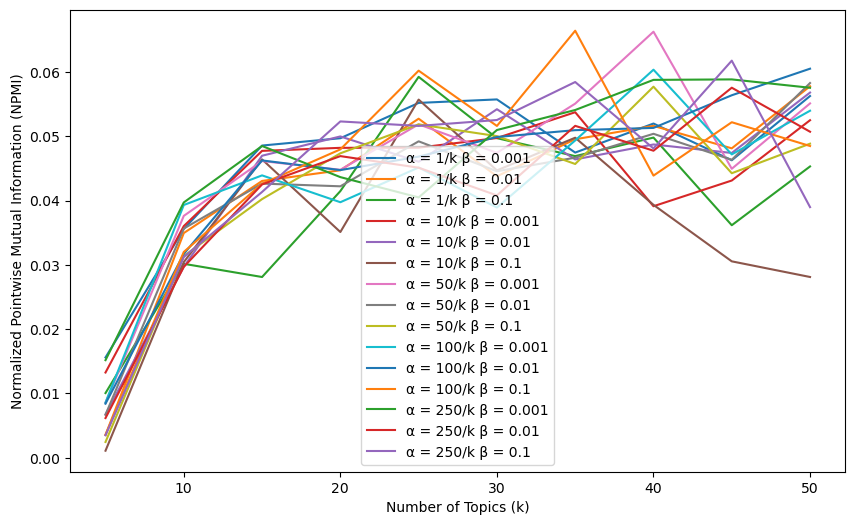

In [16]:
df = btm

df = df[df["eta"] != 1.0][df["eta"] != 0.5] #

fig, ax = plt.subplots(figsize = (10, 6))

for i in df["hyperparameters"].unique():
    data = df[df["hyperparameters"] == i]
    ax.plot(data["k"], data["c_npmi"], label = i)
    
ax.legend()
# plt.title("The Coherence Scores of Biterm Topic Model in Different Hyperparameters")
plt.xlabel("Number of Topics (k)")
plt.ylabel("Normalized Pointwise Mutual Information (NPMI)")
plt.show()

C:\Users\Ronald Benz\AppData\Local\Temp\ipykernel_18652\754635734.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



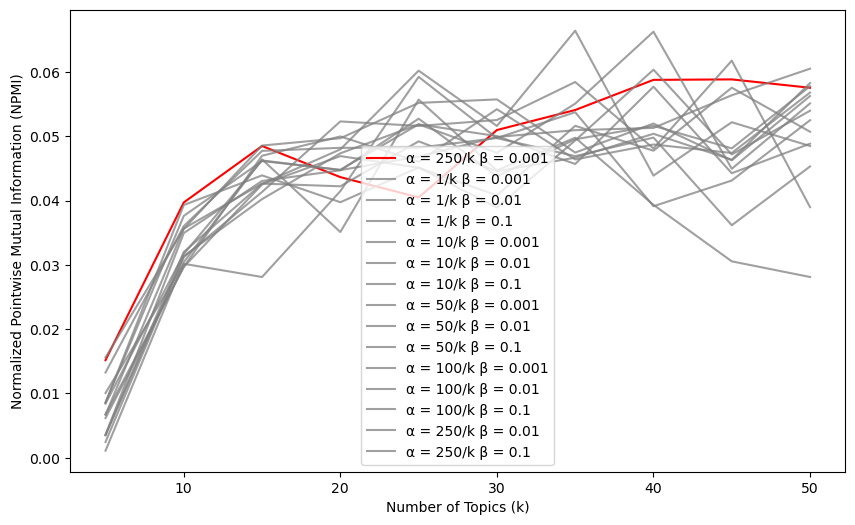

In [17]:
df = btm

df = df[df["eta"] != 1.0][df["eta"] != 0.5] #

optimal = "α = 250/k β = 0.001" #

df_optimal = df[df["hyperparameters"] == optimal]

df_not_optimal = df[df["hyperparameters"] != optimal]

fig, ax = plt.subplots(figsize = (10, 6))

ax.plot(df_optimal["k"], df_optimal["c_npmi"], label = optimal, color = "red") #

for i in df_not_optimal["hyperparameters"].unique():
    data = df_not_optimal[df_not_optimal["hyperparameters"] == i]
    ax.plot(data["k"], data["c_npmi"], label = i, alpha = 0.75, color = "gray")
    
ax.legend()
# plt.title("The Coherence Scores of the Biterm Topic Model with the Optimal Hyperparameters")
plt.xlabel("Number of Topics (k)")
plt.ylabel("Normalized Pointwise Mutual Information (NPMI)")
plt.show()

## The Optimal Hyperparameter Settings of the LDA model

In [18]:
# calculate the average coherence score for all topic
lda_mean = lda.groupby("hyperparameters").mean().reset_index()

In [19]:
lda_mean[lda_mean.u_mass == max(lda_mean.u_mass)]

hyperparameters     k  alpha  eta     m    u_mass       c_v     c_uci  \
19  α = 250/k β = 1.0  27.5  250.0  1.0  20.0 -2.801712  0.224919 -0.146724   

      c_npmi  
19 -0.019296

In [20]:
lda_mean[lda_mean.c_v == max(lda_mean.c_v)]

hyperparameters     k  alpha  eta     m    u_mass       c_v     c_uci  \
4  α = 1/k β = 1.0  27.5    1.0  1.0  20.0 -9.551223  0.427637 -4.538528   

     c_npmi  
4 -0.140915

In [21]:
lda_mean[lda_mean.c_uci == max(lda_mean.c_uci)]

hyperparameters     k  alpha  eta     m    u_mass       c_v     c_uci  \
23  α = 50/k β = 0.5  27.5   50.0  0.5  20.0 -2.824118  0.252363 -0.119042   

      c_npmi  
23 -0.013785

In [22]:
lda_mean[lda_mean.c_npmi == max(lda_mean.c_npmi)]

hyperparameters     k  alpha  eta     m    u_mass       c_v     c_uci  \
23  α = 50/k β = 0.5  27.5   50.0  0.5  20.0 -2.824118  0.252363 -0.119042   

      c_npmi  
23 -0.013785

In [23]:
lda_mean[lda_mean.hyperparameters == "α = 50/k β = 0.5"]

hyperparameters     k  alpha  eta     m    u_mass       c_v     c_uci  \
23  α = 50/k β = 0.5  27.5   50.0  0.5  20.0 -2.824118  0.252363 -0.119042   

      c_npmi  
23 -0.013785

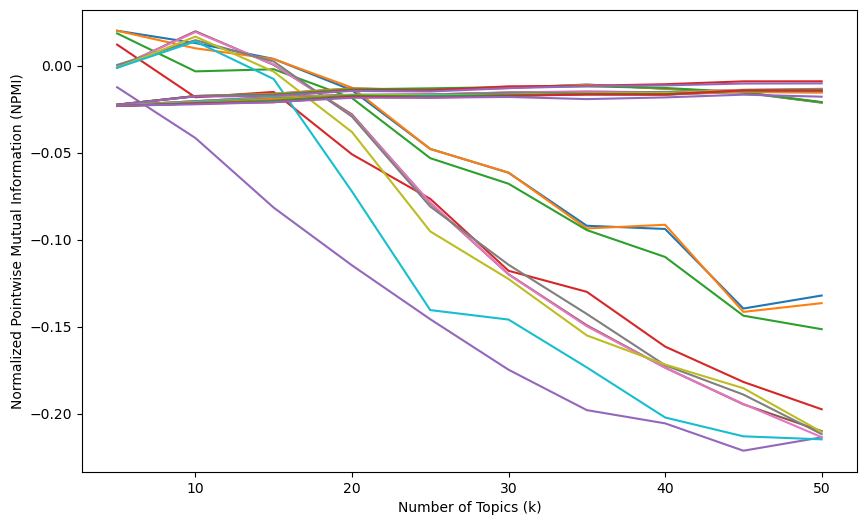

In [24]:
fig, ax = plt.subplots(figsize = (10, 6))

for i in lda["hyperparameters"].unique():
    data = lda[lda["hyperparameters"] == i]
    ax.plot(data["k"], data["c_npmi"], label = i)
    
# plt.title("The Coherence Scores of the Latent Dirichlet Allocation in Different Hyperparameters")
plt.xlabel("Number of Topics (k)")
plt.ylabel("Normalized Pointwise Mutual Information (NPMI)")
plt.show()

C:\Users\Ronald Benz\AppData\Local\Temp\ipykernel_18652\3945128193.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



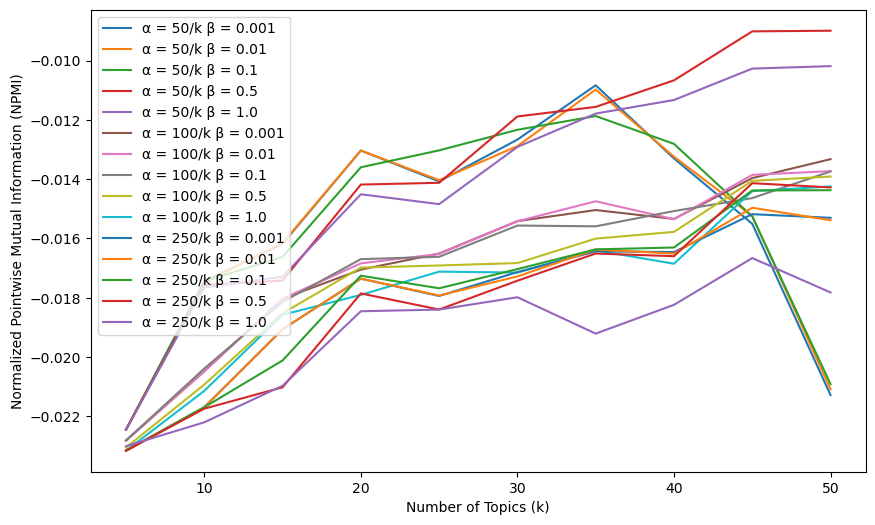

In [25]:
df = lda

df = df[df["alpha"] != 1][df["alpha"] != 10] #

fig, ax = plt.subplots(figsize = (10, 6))

for i in df["hyperparameters"].unique():
    data = df[df["hyperparameters"] == i]
    ax.plot(data["k"], data["c_npmi"], label = i)
    
ax.legend()
# plt.title("The Coherence Scores of the Latent Dirichlet Allocation in Different Hyperparameters")
plt.xlabel("Number of Topics (k)")
plt.ylabel("Normalized Pointwise Mutual Information (NPMI)")
plt.show()

C:\Users\Ronald Benz\AppData\Local\Temp\ipykernel_18652\2959436192.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



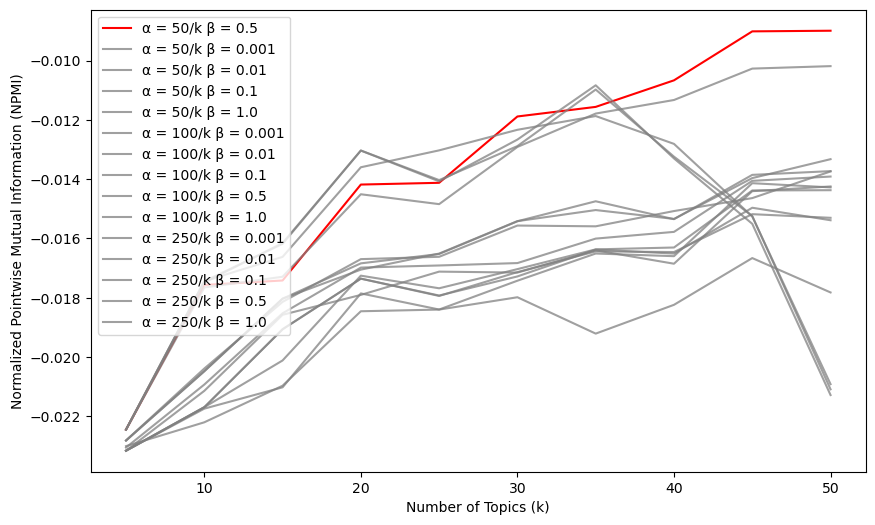

In [26]:
df = lda

df = df[df["alpha"] != 1][df["alpha"] != 10] #

optimal = "α = 50/k β = 0.5" #

df_optimal = df[df["hyperparameters"] == optimal]

df_not_optimal = df[df["hyperparameters"] != optimal]

fig, ax = plt.subplots(figsize = (10, 6))

ax.plot(df_optimal["k"], df_optimal["c_npmi"], label = optimal, color = "red") #

for i in df_not_optimal["hyperparameters"].unique():
    data = df_not_optimal[df_not_optimal["hyperparameters"] == i]
    ax.plot(data["k"], data["c_npmi"], label = i, alpha = 0.75, color = "gray")
    
ax.legend()
# plt.title("The Coherence Scores of the Latent Dirichlet Allocation with the Optimal Hyperparameters")
plt.xlabel("Number of Topics (k)")
plt.ylabel("Normalized Pointwise Mutual Information (NPMI)")
plt.show()

## Heatmap

In [27]:
btm_mean["α"] = btm_mean["alpha"].apply(lambda x: str(int(x)) + "/k")
lda_mean["α"] = lda_mean["alpha"].apply(lambda x: str(int(x)) + "/k")

btm_mean_npmi = btm_mean.pivot(index = "α", columns = "eta", values = "c_npmi").reindex(index = ["1/k", "10/k", "50/k", "100/k", "250/k"])
lda_mean_npmi = lda_mean.pivot(index = "α", columns = "eta", values = "c_npmi").reindex(index = ["1/k", "10/k", "50/k", "100/k", "250/k"])

vmin = min(btm_mean_npmi.min().min(), lda_mean_npmi.min().min())
vmax = max(btm_mean_npmi.max().max(), lda_mean_npmi.max().max())

[Text(0.5, 23.52222222222222, 'β')]

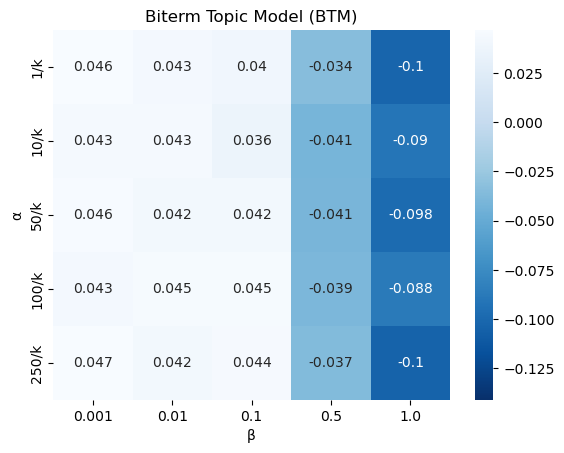

In [28]:
plt.title("Biterm Topic Model (BTM)")
ax = sns.heatmap(data = btm_mean_npmi, annot = True, vmin = vmin, vmax = vmax, cmap = "Blues_r")
ax.set(xlabel = "β")

[Text(0.5, 23.52222222222222, 'β')]

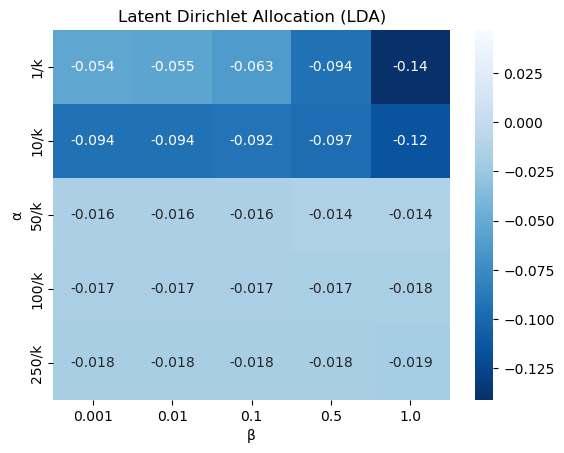

In [29]:
plt.title("Latent Dirichlet Allocation (LDA)")
ax = sns.heatmap(data = lda_mean_npmi, annot = True, vmin = vmin, vmax = vmax, cmap = "Blues_r")
ax.set(xlabel = "β")

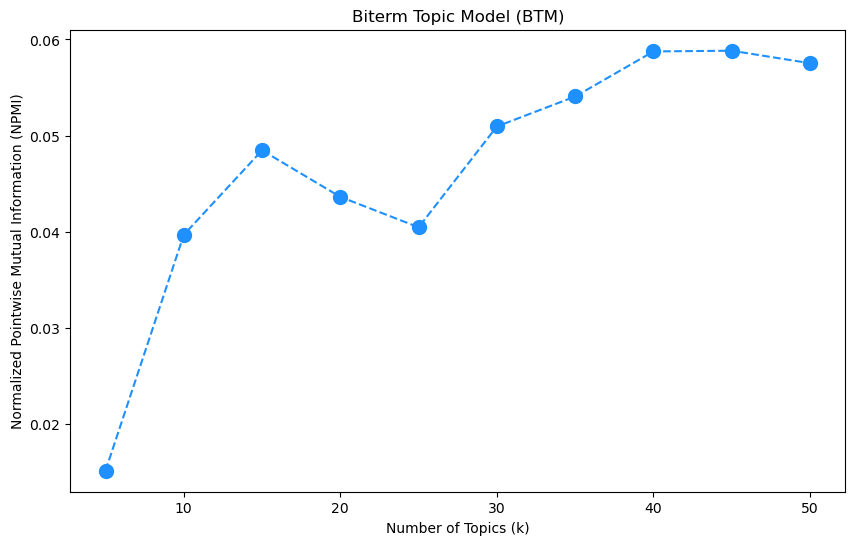

In [30]:
df = btm

optimal = "α = 250/k β = 0.001"

df_optimal = df[df["hyperparameters"] == optimal]

plt.figure(figsize = (10, 6))

plt.plot(df_optimal["k"], df_optimal["c_npmi"], color = "dodgerblue", label = optimal, linestyle = "dashed", markersize = 10, marker = "o") #

plt.title("Biterm Topic Model (BTM)")
plt.xlabel("Number of Topics (k)")
plt.ylabel("Normalized Pointwise Mutual Information (NPMI)")
plt.show()

## Maximum and Minimum

In [31]:
btm.max()

k                                50
alpha                           250
eta                             1.0
m                              20.0
u_mass                    -3.043384
c_v                        0.548335
c_uci                      0.261179
c_npmi                     0.087435
hyperparameters    α = 50/k β = 1.0
dtype: object

In [32]:
lda.max()

k                                50
alpha                           250
eta                             1.0
m                              20.0
u_mass                     -2.79846
c_v                        0.457995
c_uci                      0.059387
c_npmi                     0.020086
hyperparameters    α = 50/k β = 1.0
dtype: object

In [33]:
btm.min()

k                                  5
alpha                              1
eta                            0.001
m                               20.0
u_mass                    -15.162783
c_v                          0.31252
c_uci                      -5.525481
c_npmi                     -0.175333
hyperparameters    α = 1/k β = 0.001
dtype: object

In [34]:
lda.min()

k                                  5
alpha                              1
eta                            0.001
m                               20.0
u_mass                    -12.755153
c_v                         0.209439
c_uci                      -6.796177
c_npmi                     -0.221286
hyperparameters    α = 1/k β = 0.001
dtype: object